In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev.csv')
data.head()

SlNo  FarmerAge   FarmerEduaction  InvolveWithShrimpFarming   Latitude  \
0     1         50           Primary                        18  22.801215   
1     2         64  Junior Secondary                        20  22.840350   
2     3         25  Junior Secondary                        18  22.823490   
3     4         37         Secondary                        18  22.823569   
4     5         22           Primary                         4  22.597399   

   Longitude      Zone  PriorLandUse  Area_ha  SoilType  ...  FootBath  \
0  89.550397    Khulna             3     0.18         1  ...         0   
1  89.752238    Khulna             3     0.15         2  ...         0   
2  89.672769    Khulna             3     0.81         2  ...         0   
3  89.672605    Khulna             3     0.40         2  ...         0   
4  89.739075  Bagerhat             3     2.32         2  ...         0   

   LimitedAccess  SameEquipmentForWholeCultureArea  CulturePractice  \
0              0                                 1                2   
1              0                                 1                2   
2              0                                 1                2   
3              0                                 1                2   
4              0                                 1                2   

   Temperature   pH  Salinity  PreviousPrevalence(%)  CurrentPrevalance(%)  \
0         28.0  8.0       9.0                     70                     0   
1          NaN  NaN       NaN                     20                     0   
2          NaN  NaN       NaN                     75                    15   
3          NaN  NaN       2.0                     15                    20   
4         24.0  7.5      11.0                     15                    45   

   VirusDetected  
0              0  
1              0  
2              1  
3              1  
4              1  

[5 rows x 48 columns]

In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev.csv'
data = pd.read_csv(file_path)

column_to_delete = ['FarmerEduaction','Latitude', 'Longitude', 'SlNo', 'InletOutlet', 'Operator', 'FeedType', 'PLQuality', 'Aerator', 'PriorLandUse', 'BirdScare', 'ChemicalUseWaterTreatment', 'ChemicalUsePondPreparation', 'WaterComingViaOtherFarms', 'WaterSource_IndirectNatural', 'CrabFench', 'FootBath', 'SludgeRemovalInterval', 'CulturePractice', 'LimitedAccess', 'CultureMethod', 'Reservoir', 'PeriodOfFallow', 'FarmerAge', 'WaterSource_DirectNatural']
data = data.drop(column_to_delete, axis=1)

output_file_path = '/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev1.csv'
data.to_csv(output_file_path, index=False)

In [5]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/WSSVRiskFactor_rev1.csv')
data.head()

InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAdditives  \
0                       2  ...                15             0              1   
1                       2  ...                 7             1              1   
2                       2  ...                 8             1              0   
3                       2  ...                 5             1              0   
4                       1  ...                30             1              1   

   SameEquipmentForWholeCultureArea  Temperature   pH  Salinity  \
0                                 1         28.0  8.0       9.0   
1                                 1          NaN  NaN       NaN   
2                                 1          NaN  NaN       NaN   
3                                 1          NaN  NaN       2.0   
4                                 1         24.0  7.5      11.0   

   PreviousPrevalence(%)  CurrentPrevalance(%)  VirusDetected  
0                     70                     0              0  
1                     20                     0              0  
2                     75                    15              1  
3                     15                    20              1  
4                     15                    45              1  

[5 rows x 23 columns]

In [6]:
# Handle null values
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

data.head()

InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAdditives  \
0                       2  ...                15             0              1   
1                       2  ...                 7             1              1   
2                       2  ...                 8             1              0   
3                       2  ...                 5             1              0   
4                       1  ...                30             1              1   

   SameEquipmentForWholeCultureArea  Temperature        pH   Salinity  \
0                                 1     28.00000  8.000000   9.000000   
1                                 1     29.70122  7.723214  11.303012   
2                                 1     29.70122  7.723214  11.303012   
3                                 1     29.70122  7.723214   2.000000   
4                                 1     24.00000  7.500000  11.000000   

   PreviousPrevalence(%)  CurrentPrevalance(%)  VirusDetected  
0                     70                     0              0  
1                     20                     0              0  
2                     75                    15              1  
3                     15                    20              1  
4                     15                    45              1  

[5 rows x 23 columns]

In [7]:
# Split features and target
X = data.drop('VirusDetected', axis=1)
y = data['VirusDetected']

# List of categorical columns
categorical_cols = ['Zone']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' removes one level to avoid multicollinearity

# Encode categorical columns and concatenate with remaining numerical columns
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Display the encoded dataset
print(X_final)
print(y)


     InvolveWithShrimpFarming  Area_ha  SoilType  CanalDepth_ft  GherDepth_ft  \
0                          18     0.18         1            7.0           5.0   
1                          20     0.15         2            7.0           3.0   
2                          18     0.81         2            6.0           4.0   
3                          18     0.40         2            6.0           4.0   
4                           4     2.32         2            6.0           2.5   
..                        ...      ...       ...            ...           ...   
228                         1     2.83         1            0.0           4.5   
229                         5     0.87         1            0.0           5.0   
230                        12     0.20         2            5.0           1.5   
231                         2    40.49         3            0.0           5.5   
232                        10     0.81         3            4.0           2.5   

     FertilizerUse  GherDry

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Data Summary:
   InvolveWithShrimpFarming      Zone  Area_ha  SoilType  CanalDepth_ft  \
0                        18    Khulna     0.18         1            7.0   
1                        20    Khulna     0.15         2            7.0   
2                        18    Khulna     0.81         2            6.0   
3                        18    Khulna     0.40         2            6.0   
4                         4  Bagerhat     2.32         2            6.0   

   GherDepth_ft  FertilizerUse  GherDryAfterHarvest  SludgeRemovalMethods  \
0           5.0              1                    1                     3   
1           3.0              3                    1                     2   
2           4.0              4                    1                     2   
3           4.0              4                    1                     2   
4           2.5              4                    1                     1   

   MaintainAndRepairDikes  ...  StockingAge_Days  CropRotation  FeedAddi

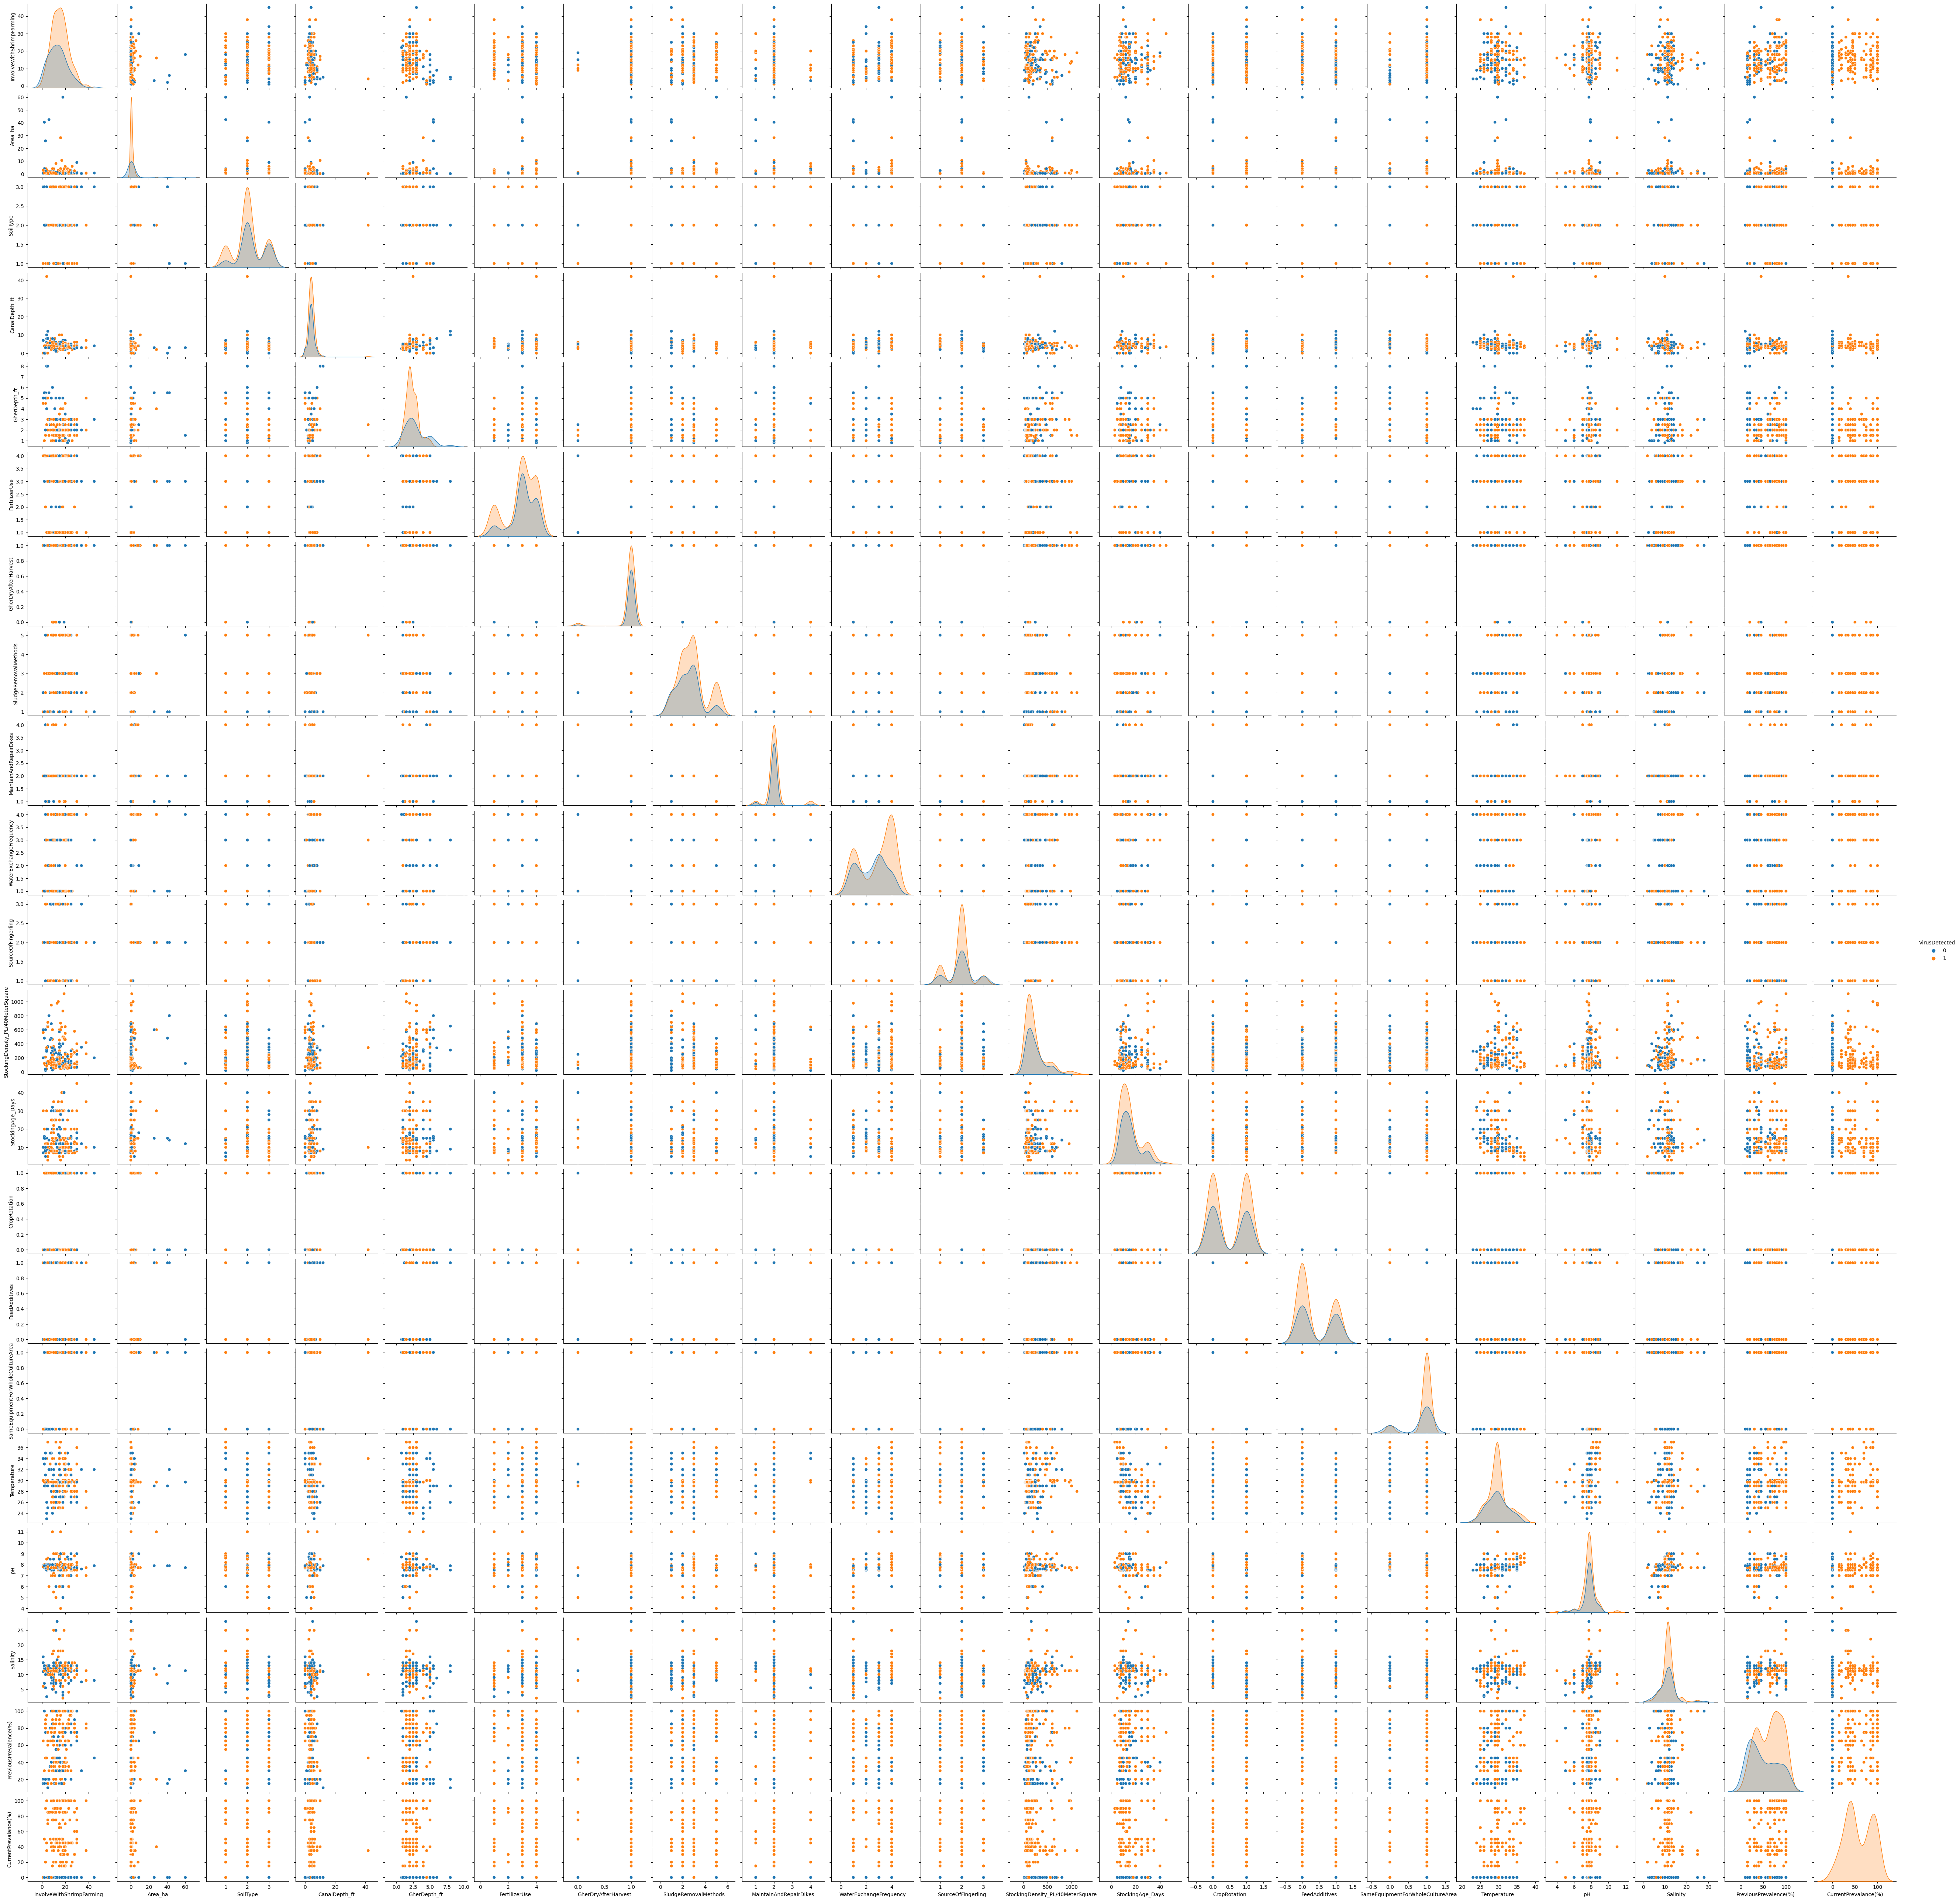

<ipython-input-8-1443031ff5a4>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


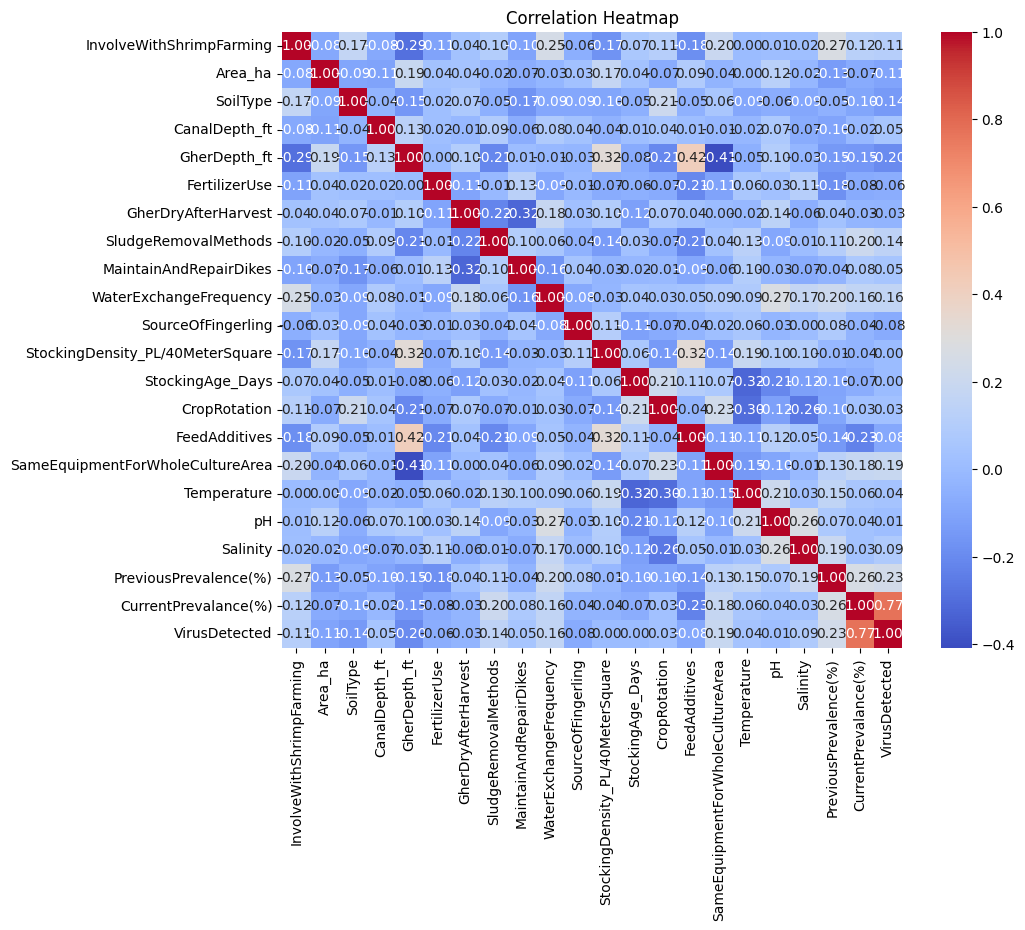

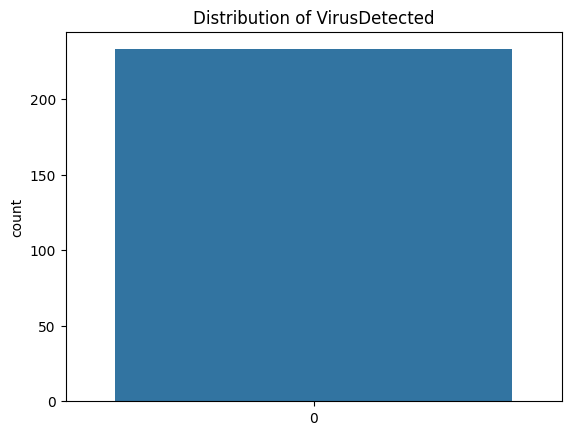

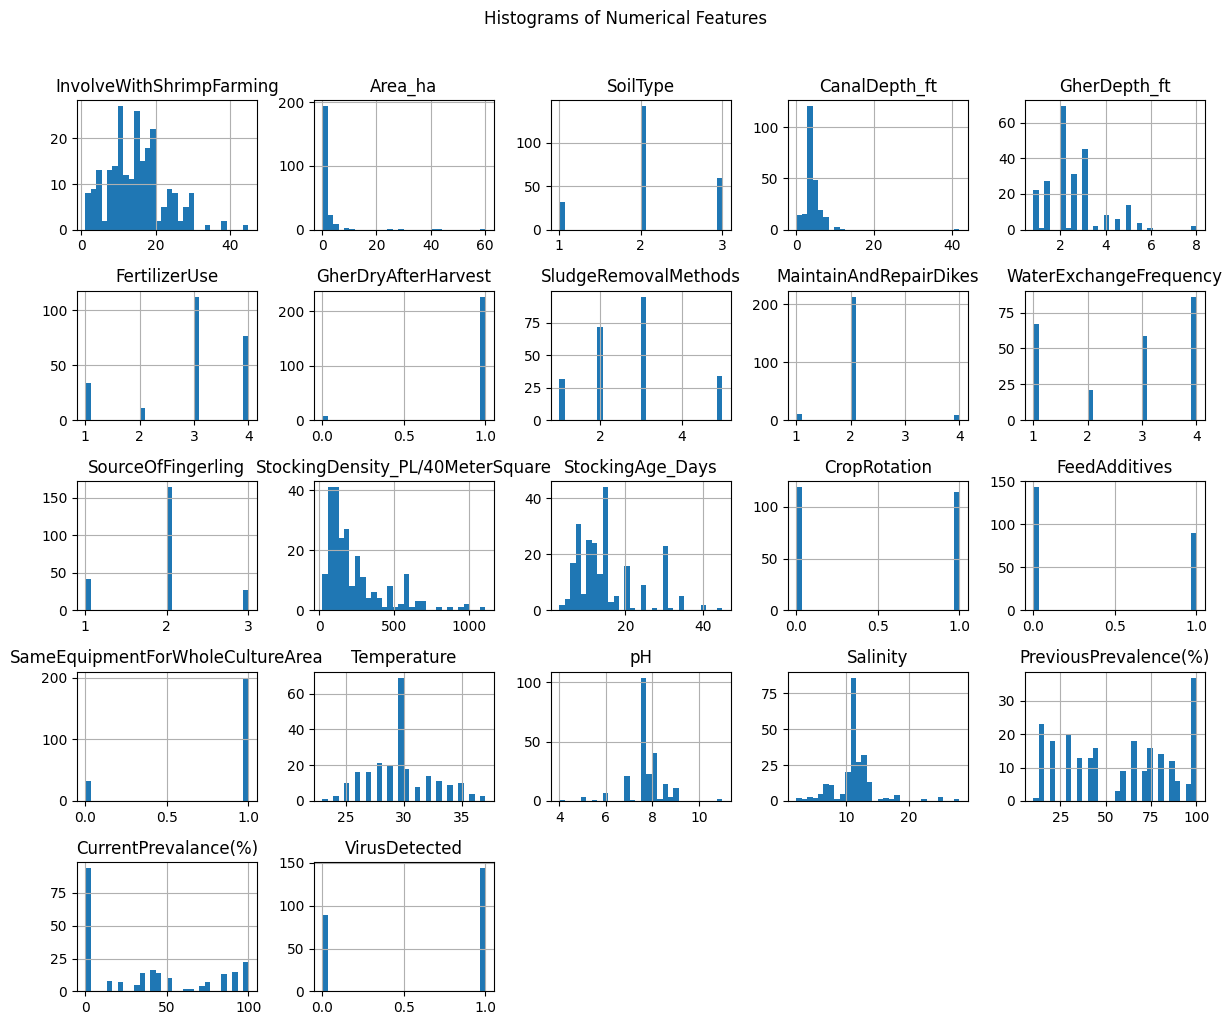

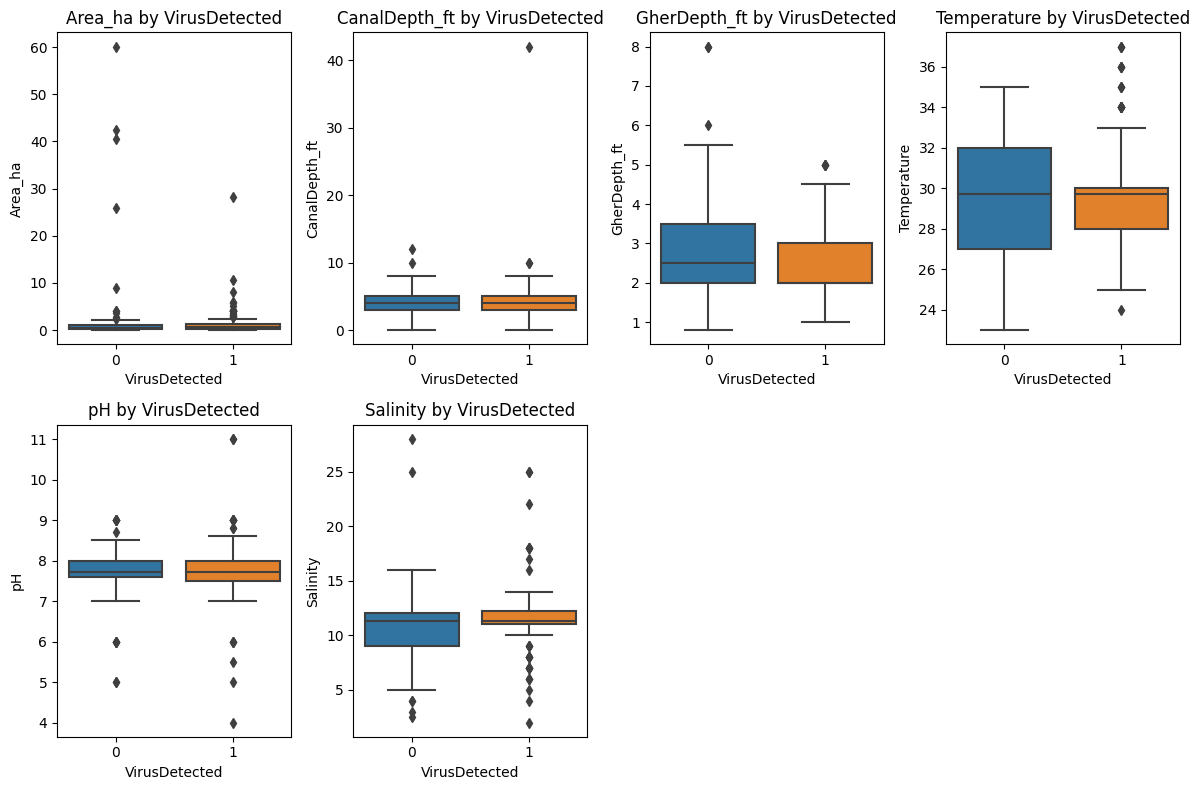

In [8]:

# Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='VirusDetected', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'VirusDetected'
sns.countplot(data['VirusDetected'])
plt.title('Distribution of VirusDetected')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by VirusDetected
numerical_features = data.select_dtypes(include=['float64']).columns
num_features_count = len(numerical_features)
num_subplots = min(num_features_count, 8)  # Adjusted to ensure maximum 8 subplots

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='VirusDetected', y=feature, data=data)
    plt.title(f'{feature} by VirusDetected')
    if i == num_subplots:  # Break loop after 8 subplots
        break

plt.tight_layout()
plt.show()


In [9]:
corr = data.corr(numeric_only=True)


In [10]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Initialize the CHAID decision tree classifier
chaid_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the CHAID model
chaid_classifier.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_classifier.predict(X_test)
chaid_predictions = chaid_classifier.predict(X_test)

# Combine predictions using a simple majority vote
ensemble_predictions = (rf_predictions + chaid_predictions) >= 1

# Calculate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.9574468085106383


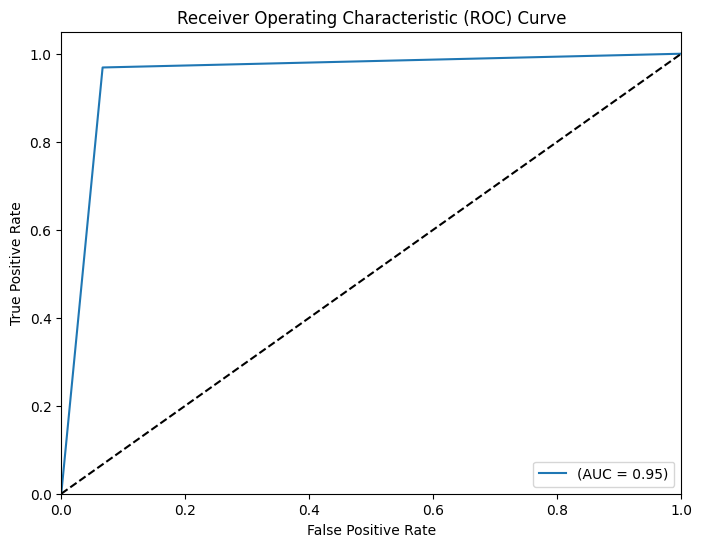

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC score for the Random Forest model
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Calculate the ROC curve and AUC score for the CHAID model
chaid_probs = chaid_classifier.predict_proba(X_test)[:, 1]
chaid_fpr, chaid_tpr, _ = roc_curve(y_test, chaid_probs)
chaid_auc = roc_auc_score(y_test, chaid_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
#plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(chaid_fpr, chaid_tpr, label=f'(AUC = {chaid_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


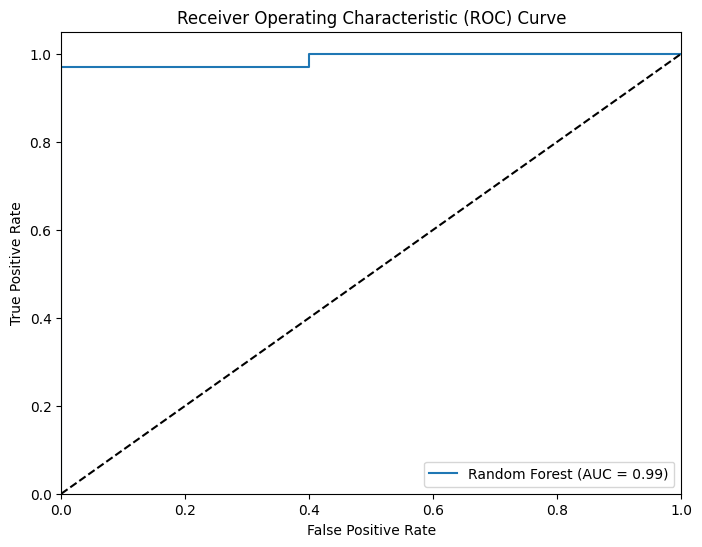

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC score for the Random Forest model
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve for Random Forest only
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=8f7f399b0b7da6a4677953ea1725aebba41224a1a272ed2b71763635d1fb45bb
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [19]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize TPOTClassifier
tpot_classifier = TPOTClassifier(
    generations=5,  # Number of generations to run the search for
    population_size=20,  # Number of individuals in each generation
    cv=5,  # Number of cross-validation folds
    random_state=42,
    verbosity=2  # Set verbosity level for progress updates
)

# Fit the TPOTClassifier on your training data
tpot_classifier.fit(X_train, y_train)

# Evaluate the TPOTClassifier on the testing data
tpot_predictions = tpot_classifier.predict(X_test)
tpot_accuracy = accuracy_score(y_test, tpot_predictions)
print("TPOT Classifier Accuracy:", tpot_accuracy)

# Export the best pipeline found by TPOT
tpot_classifier.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9783783783783784

Generation 2 - Current best internal CV score: 0.9783783783783784

Generation 3 - Current best internal CV score: 0.9783783783783784

Generation 4 - Current best internal CV score: 0.9783783783783784

Generation 5 - Current best internal CV score: 0.9783783783783784

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)
TPOT Classifier Accuracy: 0.9148936170212766


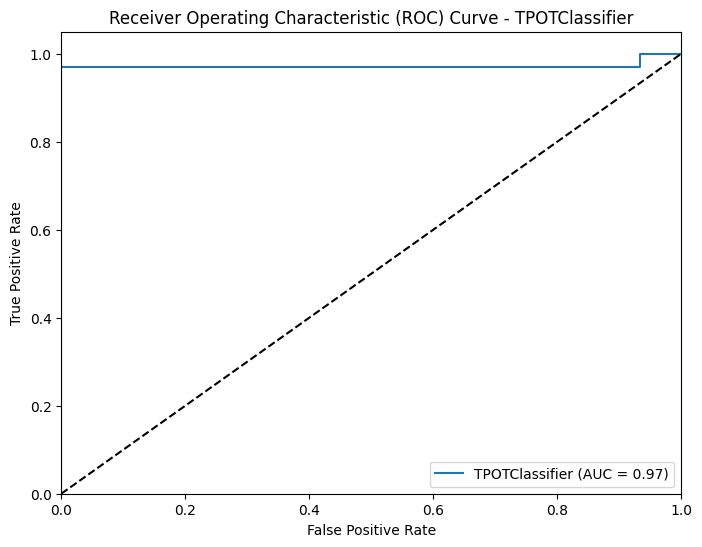

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC score for the TPOTClassifier model
tpot_probs = tpot_classifier.predict_proba(X_test)[:, 1]
tpot_fpr, tpot_tpr, _ = roc_curve(y_test, tpot_probs)
tpot_auc = roc_auc_score(y_test, tpot_probs)

# Plot ROC curve for TPOTClassifier
plt.figure(figsize=(8, 6))
plt.plot(tpot_fpr, tpot_tpr, label=f'TPOTClassifier (AUC = {tpot_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - TPOTClassifier')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the BaggingClassifier
bagging_classifier = BaggingClassifier(
    base_classifier,
    n_estimators=10,  # Number of base classifiers (trees)
    max_samples=0.8,   # Proportion of samples to draw from the training set for each base classifier
    random_state=42
)

# Train the BaggingClassifier
bagging_classifier.fit(X_train, y_train)

# Make predictions using the BaggingClassifier
bagging_predictions = bagging_classifier.predict(X_test)

# Calculate the accuracy of the BaggingClassifier
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", bagging_accuracy)


Bagging Classifier Accuracy: 0.9787234042553191


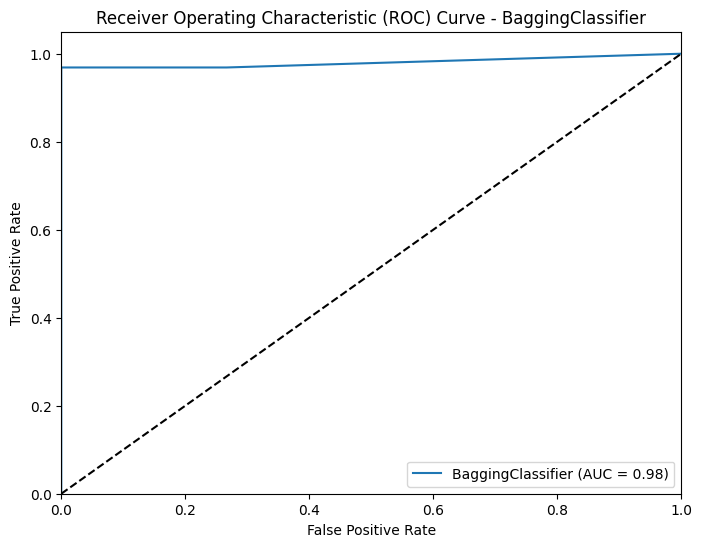

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC score for the BaggingClassifier model
bagging_probs = bagging_classifier.predict_proba(X_test)[:, 1]
bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging_probs)
bagging_auc = roc_auc_score(y_test, bagging_probs)

# Plot ROC curve for BaggingClassifier
plt.figure(figsize=(8, 6))
plt.plot(bagging_fpr, bagging_tpr, label=f'BaggingClassifier (AUC = {bagging_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - BaggingClassifier')
plt.legend(loc="lower right")
plt.show()
